This notebook will clean and explore the dataset to then start creating models off of it and then solve the chosen problems.

In [3]:
#if using kaggle api 

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("piterfm/massive-missile-attacks-on-ukraine")

#print("Path to dataset files:", path)

In [81]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set (style="darkgrid")

In [94]:
# from direct download

df = pd.read_csv("Datasets/missile_attacks_daily.csv")

dataset = df

In [95]:
dataset.head()

,time_start,time_end,model,launch_place,target,carrier,launched,destroyed,not_reach_goal,cross_border_belarus,back_russia,still_attacking,affected region,destroyed_details,launched_details,launch_place_details,source
0,2025-04-05 05:30,2025-04-06 06:20,X-101/X-555,Saratov oblast,Ukraine,Tu-95MS,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
1,2025-04-06 05:00,2025-04-06 05:15,Kalibr,Bryansk oblast,Kyiv oblast,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
2,2025-04-05 20:00,2025-04-06 04:30,Shahed-136/131,"Primorsko-Akhtarsk and Chauda, Crimea and Kurs...",Ukraine,NaN,109.0,40.0,53.0,NaN,NaN,NaN,"['Sumy oblast', 'Kyiv oblast', 'Kharkiv oblast...",{'east': 16},NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
3,2025-04-06 01:50,2025-04-06 03:00,Kalibr,Black Sea,Ukraine,Navi,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
4,2025-04-04 21:00,2025-04-05 09:00,Shahed-136/131,"Primorsko-Akhtarsk and Chauda, Crimea and Brya...",Ukraine,NaN,92.0,51.0,31.0,NaN,NaN,NaN,"['Sumy oblast', 'Kyiv oblast', 'Dnipropetrovsk...","{'south': 3, 'east': 23, 'north': NaN, 'center...",NaN,NaN,kpszsu/posts/pfbid014VJsDMy6R5f8W1zN8XaALZZ72i...


In [96]:
len(df)

2304

In [97]:
df.columns

Index(['time_start', 'time_end', 'model', 'launch_place', 'target', 'carrier',
       'launched', 'destroyed', 'not_reach_goal', 'cross_border_belarus',
       'back_russia', 'still_attacking', 'affected region',
       'destroyed_details', 'launched_details', 'launch_place_details',
       'source'],
      dtype='object')

In [100]:
# Viewing the datatypes of the dataset for cleaning
df.dtypes

time_start              datetime64[ns, UTC]
time_end                datetime64[ns, UTC]
model                                object
launch_place                         object
target                               object
carrier                              object
launched                            float64
destroyed                           float64
not_reach_goal                      float64
cross_border_belarus                float64
back_russia                         float64
still_attacking                     float64
affected region                      object
destroyed_details                    object
launched_details                     object
launch_place_details                 object
source                               object
dtype: object

Cleaning the dataset

Convert time_start and time_end to datetime

In [114]:
# Convert to datetime
df['time_start'] = pd.to_datetime(df['time_start'], errors='coerce')
df['time_end'] = pd.to_datetime(df['time_end'], errors='coerce')


In [115]:
# Verifying the changes
print(df[['time_start', 'time_end']].head())
print(df.dtypes) # time_start and time_end should now be datetime64[ns]

           time_start            time_end
0 2025-04-05 05:30:00 2025-04-06 06:20:00
1 2025-04-06 05:00:00 2025-04-06 05:15:00
2 2025-04-05 20:00:00 2025-04-06 04:30:00
3 2025-04-06 01:50:00 2025-04-06 03:00:00
4 2025-04-04 21:00:00 2025-04-05 09:00:00
time_start              datetime64[ns]
time_end                datetime64[ns]
model                           object
launch_place                    object
target                          object
carrier                         object
launched                       float64
destroyed                      float64
not_reach_goal                 float64
cross_border_belarus           float64
back_russia                    float64
still_attacking                float64
affected region                 object
destroyed_details               object
launched_details                object
launch_place_details            object
source                          object
dtype: object


In [117]:
# calculating the amount of nat Not a Time values in the two columns
total_rows = len(df)

# For time_start
nat_start_count = df['time_start'].isna().sum()
nat_start_pct = (nat_start_count / total_rows) * 100

# For time_end
nat_end_count = df['time_end'].isna().sum()
nat_end_pct = (nat_end_count / total_rows) * 100

print(f"time_start: {nat_start_count} NaT values ({nat_start_pct:.2f}%)")
print(f"time_end: {nat_end_count} NaT values ({nat_end_pct:.2f}%)")


time_start: 1582 NaT values (68.66%)
time_end: 809 NaT values (35.11%)


Handling null/missing values in numeric fields like launched, destroyed

Parsing destroyed_details, launched_details, and launch_place_details if they contain structured info (e.g., JSON or consistent text format)

Exploring the dataset

This graph shows Missile launched and UAVs vs Destroyed
Overall trend:

    There's a dramatic increase in missile/UAV activity starting around mid/late 2024.

    This shows a clear escalation in attacks.

2. Intercept effectiveness:

    The destroyed line follows the launched line fairly closely, but:

        In earlier periods, they're often very close — indicating high interception rates.

        In the more recent months (late 2024–early 2025), the gap between launched and destroyed widens, suggesting:

            Either more missiles are getting through.

            Or defenses are being overwhelmed.

            Or simply more launched than before — harder to keep up.

3. Attack waves:

    You can spot waves or cycles of intensity — peaks every few weeks.

    Could be tied to strategic events, weather conditions, or specific campaigns.

In [129]:
# Resample weekly for trends
weekly = df.resample('W')[['launched', 'destroyed']].sum().fillna(0)


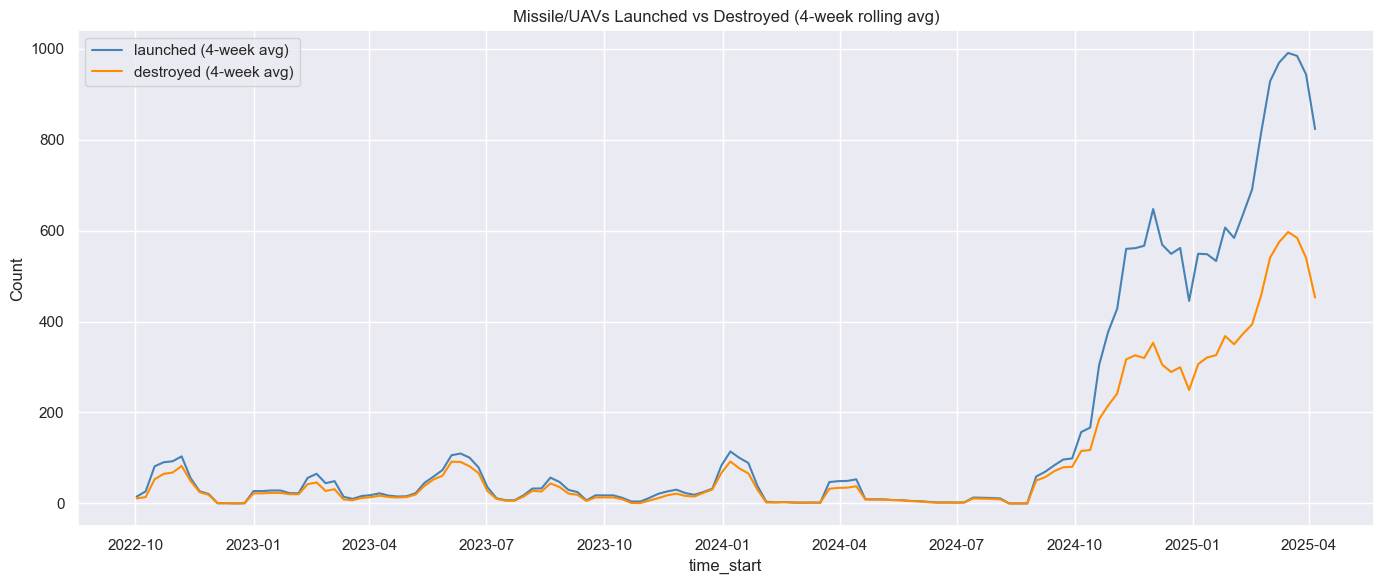

In [135]:
# 4 week rolling average (adjust window for different smoothing)
weekly_smoothed = weekly.rolling(window=4, min_periods=1).mean()

# plotting launch vs destroyed over time
plt.figure(figsize=(14, 6))
plt.plot(weekly_smoothed.index, weekly_smoothed['launched'], label='launched (4-week avg)' , color='steelblue')
plt.plot(weekly_smoothed.index, weekly_smoothed['destroyed'], label='destroyed (4-week avg)', color='darkorange')
plt.title("Missile/UAVs Launched vs Destroyed (4-week rolling avg)")
plt.xlabel("time_start")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()